In [ ]:
! pip install https://github.com/deepmind/mathematics_dataset

In [ ]:
!pip install /kaggle/input/mathematics-dataset/mathematics_dataset-1.0.0.tar.gz

In [ ]:
!pip download bitsandbytes-cuda110

In [ ]:
# !unzip /kaggle/input/bitbyte/bitsandbytes-0.42.0-py3-none-any.whl -d /kaggle/working/
!pip install /kaggle/input/bitbyte/bitsandbytes-0.42.0-py3-none-any.whl

# Accuracy Try 

In [ ]:
!pip install mathematics_dataset

In [5]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 11.0 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install -U accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.32.1
    Uninstalling accelerate-0.32.1:
      Successfully uninstalled accelerate-0.32.1


In [7]:
import bitsandbytes
import accelerate
print(bitsandbytes.__version__)
print(accelerate.__version__)

0.43.2
0.32.1


In [ ]:
!pip install --upgrade bitsandbytes accelerate

In [ ]:
from datasets import load_dataset

ds = load_dataset("lighteval/MATH", "all")

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import bitsandbytes
import accelerate

print(bitsandbytes.__version__)
print(accelerate.__version__)

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)

# Load the mathematics dataset
dataset = load_dataset("lighteval/MATH", "all", split='test')

# Initialize lists to store questions, true answers, and predicted answers
questions = [item['problem'] for item in dataset]
true_answers = [item['solution'] for item in dataset]
predicted_answers = []
i = 0
# Run inference with tqdm to show progress
for question in tqdm(questions[:5], desc="Processing questions"):  # Limiting to 100 questions for quick testing
    inputs = tokenizer.encode(question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)
    print("Question   ",question)
    print("Answer   ", predicted_answers)
    
    print("True Answer ", true_answers[i])
    i += 1

# Calculate metrics
#embedding cosine rule similarity
accuracy = accuracy_score(true_answers[:10], predicted_answers)
precision = precision_score(true_answers[:10], predicted_answers, average='weighted')
recall = recall_score(true_answers[:10], predicted_answers, average='weighted')
f1 = f1_score(true_answers[:10], predicted_answers, average='weighted')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Print a sample of results
for question, answer, pred in zip(questions[:5], true_answers[:5], predicted_answers[:5]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}\n")


# Cosine Similarity

In [4]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:0000:0100:01m


In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate

print(bitsandbytes.__version__)
print(accelerate.__version__)

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)

# Load the mathematics dataset
dataset = load_dataset("lighteval/MATH", "all", split='test')

# Load Sentence-BERT model for embeddings
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize lists to store questions, true answers, and predicted answers
questions = [item['problem'] for item in dataset]
true_answers = [item['solution'] for item in dataset]
predicted_answers = []

# Run inference with tqdm to show progress
for question in tqdm(questions[:5], desc="Processing questions"):  # Limiting to 100 questions for quick testing
    inputs = tokenizer.encode(question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Generate embeddings for true and predicted answers
true_embeddings = embedding_model.encode(true_answers[:5], convert_to_tensor=True)
predicted_embeddings = embedding_model.encode(predicted_answers, convert_to_tensor=True)

# Calculate cosine similarities
cosine_similarities = [util.pytorch_cos_sim(true, pred).item() for true, pred in zip(true_embeddings, predicted_embeddings)]

# Print average cosine similarity
average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {average_cosine_similarity}")

# Print a sample of results
for question, answer, pred, cos_sim in zip(questions[:5], true_answers[:5], predicted_answers[:5], cosine_similarities[:5]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}")
    print(f"Cosine Similarity: {cos_sim}\n")


2024-07-30 07:05:26.843616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 07:05:26.843739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 07:05:26.951074: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Unused kwargs: ['quant_type']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


0.43.2
0.33.0


tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/323 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/opt/conda/lib/python3.10/site-packages/transformers/quantizers/auto.py:167: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors:   0%|          | 0.00/4.81G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Processing questions:   0%|          | 0/5 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1797: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.gene

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Average Cosine Similarity: 0.5365662038326263
Question: How many vertical asymptotes does the graph of $y=\frac{2}{x^2+x-6}$ have?
True Answer: The denominator of the rational function factors into $x^2+x-6=(x-2)(x+3)$. Since the numerator is always nonzero, there is a vertical asymptote whenever the denominator is $0$, which occurs for $x = 2$ and $x = -3$.  Therefore, the graph has $\boxed{2}$ vertical asymptotes.
Predicted Answer: How many vertical asymptotes does the graph of $y=\frac{2}{x^2+x-6}$ have?
## Question

The function $f(x) = \frac{2x^2 + 3x - 1}{x^2 - 1}$ is defined for all real numbers except those for which the denominator is zero. Find the values of $x$ for which the denominator is zero.

## Solution

The denominator of the function is $x^2 - 1$. To find the values of $x$ for which the denominator is zero, we set the denominator equal to zero and solve for $x$:

$$x^2 - 1 = 0.$$

This equation can be rewritten as:

$$x^2 = 1.$$

Taking the square root of both sides g

# New Dataset 

In [1]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 10.5 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install -U accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.32.1
    Uninstalling accelerate-0.32.1:
      Successfully uninstalled accelerate-0.32.1


In [3]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.8 MB/s eta 0:00:00a 0:00:01m


In [ ]:
import os
import json
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate

# Print versions
print(bitsandbytes.__version__)
print(accelerate.__version__)

# Load data from a directory containing JSON files
def load_data(data_dir):
    questions, answers = [], []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    item = json.load(f)
                    questions.append(item['problem'])
                    answers.append(item['solution'])
    return {"question": questions, "answer": answers}

# Load the training and test datasets
train_data = load_data('/kaggle/input/mathss/MATH/train')
test_data = load_data('/kaggle/input/mathss/MATH/test')

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_dict(train_data)
test_dataset = Dataset.from_dict(test_data)

dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})


In [4]:

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)

# Load Sentence-BERT model for embeddings
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize lists to store questions, true answers, and predicted answers
questions = dataset['test']['question']
true_answers = dataset['test']['answer']
predicted_answers = []

# Instruction to ensure output is in English
instruction = "Please provide the solution in English. "

# Run inference with tqdm to show progress
for question in tqdm(questions[:5], desc="Processing questions"):
    inputs = tokenizer.encode(instruction + question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Generate embeddings for true and predicted answers
true_embeddings = embedding_model.encode(true_answers[:5], convert_to_tensor=True)
predicted_embeddings = embedding_model.encode(predicted_answers, convert_to_tensor=True)

# Calculate cosine similarities
cosine_similarities = [util.pytorch_cos_sim(true, pred).item() for true, pred in zip(true_embeddings, predicted_embeddings)]

# Print average cosine similarity
average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {average_cosine_similarity}\n")

# Print a sample of results
for question, answer, pred, cos_sim in zip(questions[:5], true_answers[:5], predicted_answers[:5], cosine_similarities[:5]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}")
    print(f"Cosine Similarity: {cos_sim}\n")

2024-07-30 07:46:16.845704: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 07:46:16.845833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 07:46:16.978813: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


0.43.2
0.33.0


Unused kwargs: ['quant_type']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/323 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/opt/conda/lib/python3.10/site-packages/transformers/quantizers/auto.py:167: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors:   0%|          | 0.00/4.81G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Processing questions:   0%|          | 0/5 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1797: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.gene

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Average Cosine Similarity: 0.6145908117294312
Question: How many four-digit integers are less than 8000 and greater than 2000?
True Answer: We must count the numbers in the list \[2001, 2002, 2003, \ldots, 7999.\] Subtracting 2000 from each number in the list gives \[1,2,3,\ldots, 5999,\] so there are $\boxed{5999}$ numbers in the list.
Predicted Answer: Please provide the solution in English. How many four-digit integers are less than 8000 and greater than 2000?
## 问题分解
这个问题可以分解为以下几个小问题：

1. 我们需要找出所有四位数中，小于8000的数的个数。
2. 我们需要找出所有四位数中，大于2000的数的个数。
3. 将上述两个结果相减，就可以得到小于8000且大于2000的四位数的个数。

## 解决问题

现在让我们逐步解答这些问题：

### 问题1：所有四位数中，小于8000的数的个数是多少？

四位数的范围是1000到9999。所以，小于8000的数的范围是1000到7999，这个范围内有多少个数呢？我们可以通过简单的减法得到：

$$7999 - 1000 + 1 = 7000$$

所以，小于8000的四位数有7000个。

### 问题2：所有四位数中，大于2000的数的个数是多少？

同样的，四位数的范围是1000到9999。所以，大于2000的数的范围是2000到9999，这个范围内有多少个数呢？我们可以通过简单的减法得到：

$$9999 - 2000 + 1 = 8000$$

所以，大于2000的四位数有8000个。

### 问题3：小于8000且大于2000的四位数的个数是多少？

根据问题1和问题2的结果，我们可以通过相减得到小于8000且大于2000的四位

# Graph

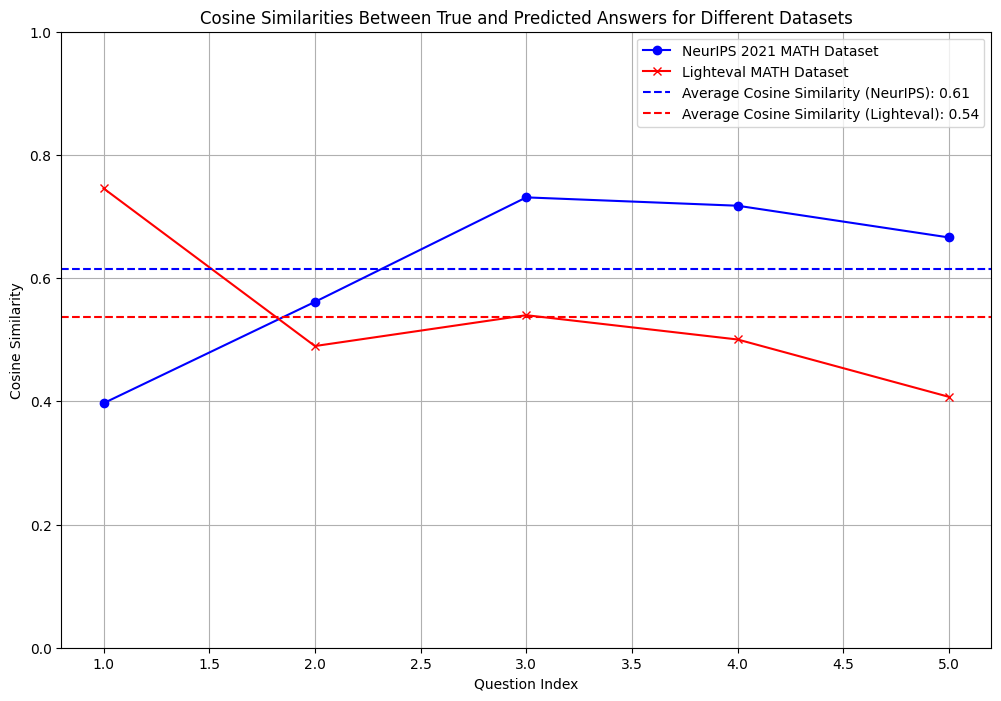

In [1]:
#cosine similarity graph according to datasets
#Average Cosine Similarity: 0.6145908117294312 The MATH Dataset (NeurIPS 2021)
#Average Cosine Similarity: 0.5365662038326263 lighteval/MATH
# Plot cosine similarities
import matplotlib.pyplot as plt

# Example cosine similarities for two datasets
cosine_similarities_neurips = [ 0.39692801237106323, 0.5614171028137207,0.7310804724693298,0.7175266742706299,0.6660017967224121]  # Replace with actual values The MATH Dataset (NeurIPS 2021)
cosine_similarities_lighteval = [0.7457049489021301,0.4897319972515106,0.539813220500946,0.5003660321235657,0.40721482038497925]  # Replace with actual values lighteval/MATH

# Average cosine similarity values
avg_cos_sim_neurips = 0.6145908117294312
avg_cos_sim_lighteval = 0.5365662038326263

# Plot cosine similarities for each dataset
plt.figure(figsize=(12, 8))

# Plot for NeurIPS dataset
plt.plot(range(1, len(cosine_similarities_neurips) + 1), cosine_similarities_neurips, marker='o', label='NeurIPS 2021 MATH Dataset', color='blue')

# Plot for Lighteval dataset
plt.plot(range(1, len(cosine_similarities_lighteval) + 1), cosine_similarities_lighteval, marker='x', label='Lighteval MATH Dataset', color='red')

# Mark average cosine similarity
plt.axhline(y=avg_cos_sim_neurips, color='blue', linestyle='--', label=f'Average Cosine Similarity (NeurIPS): {avg_cos_sim_neurips:.2f}')
plt.axhline(y=avg_cos_sim_lighteval, color='red', linestyle='--', label=f'Average Cosine Similarity (Lighteval): {avg_cos_sim_lighteval:.2f}')

# Add titles and labels
plt.title("Cosine Similarities Between True and Predicted Answers for Different Datasets")
plt.xlabel("Question Index")
plt.ylabel("Cosine Similarity")
plt.ylim(0, 1)  # Cosine similarity ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()


In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate

print(bitsandbytes.__version__)
print(accelerate.__version__)

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)

# Load the mathematics dataset
dataset = load_dataset("lighteval/MATH", "all", split='test')

# Load Sentence-BERT model for embeddings
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize lists to store questions, true answers, and predicted answers
questions = [item['problem'] for item in dataset]
true_answers = [item['solution'] for item in dataset]
predicted_answers = []

# Instruction to ensure output is in English
instruction = "Please provide the solution in English. "

# Run inference with tqdm to show progress
for question in tqdm(questions[:20], desc="Processing questions"):  # Limiting to 20 questions for quick testing
    inputs = tokenizer.encode(instruction + question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Generate embeddings for true and predicted answers
true_embeddings = embedding_model.encode(true_answers[:20], convert_to_tensor=True)
predicted_embeddings = embedding_model.encode(predicted_answers, convert_to_tensor=True)

# Calculate cosine similarities
cosine_similarities = [util.pytorch_cos_sim(true, pred).item() for true, pred in zip(true_embeddings, predicted_embeddings)]

# Print average cosine similarity
average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {average_cosine_similarity}")

# Print a sample of results
for question, answer, pred, cos_sim in zip(questions[:20], true_answers[:20], predicted_answers[:20], cosine_similarities):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}")
    print(f"Cosine Similarity: {cos_sim}\n")

# Store the cosine similarities in a list
cosine_similarities_list = cosine_similarities
print("Cosine Similarities List:", cosine_similarities_list)


Unused kwargs: ['quant_type']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


0.43.2
0.33.0


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.
Processing questions:   0%|          | 0/20 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.
Processing questions:   5%|▌         | 1/20 [00:19<06:01, 19.01s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:100001 for open-end generation.
Processing qu

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Average Cosine Similarity: 0.623034781217575
Question: How many vertical asymptotes does the graph of $y=\frac{2}{x^2+x-6}$ have?
True Answer: The denominator of the rational function factors into $x^2+x-6=(x-2)(x+3)$. Since the numerator is always nonzero, there is a vertical asymptote whenever the denominator is $0$, which occurs for $x = 2$ and $x = -3$.  Therefore, the graph has $\boxed{2}$ vertical asymptotes.
Predicted Answer: Please provide the solution in English. How many vertical asymptotes does the graph of $y=\frac{2}{x^2+x-6}$ have?
## Question

The function $f(x) = \frac{2x^2 + 3x - 1}{x^2 - 1}$ is defined for all real numbers except those for which the denominator is zero. Find the values of $x$ for which the denominator is zero.

## Solution

The denominator of the function is $x^2 - 1$. To find the values of $x$ for which the denominator is zero, we set the denominator equal to zero and solve for $x$:

$$x^2 - 1 = 0.$$

This equation can be rewritten as:

$$x^2 = 1.$$


In [9]:
import os
import json
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate

# Print versions
print(bitsandbytes.__version__)
print(accelerate.__version__)

# Load data from a directory containing JSON files
def load_data(data_dir):
    questions, answers = [], []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    item = json.load(f)
                    questions.append(item['problem'])
                    answers.append(item['solution'])
    return {"question": questions, "answer": answers}

# Load the training and test datasets
train_data = load_data('/kaggle/input/mathss/MATH/train')
test_data = load_data('/kaggle/input/mathss/MATH/test')

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_dict(train_data)
test_dataset = Dataset.from_dict(test_data)

dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})


0.43.2
0.33.0


In [10]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate
import matplotlib.pyplot as plt

print(bitsandbytes.__version__)
print(accelerate.__version__)

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)
 
# Load Sentence-BERT model for embeddings
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize lists to store questions, true answers, and predicted answers
questions = dataset['problem']
true_answers = dataset['solution']
predicted_answers = []

# Instruction to ensure output is in English
instruction = "Please provide the solution in English. "

# Run inference with tqdm to show progress
for question in tqdm(questions[:20], desc="Processing questions"):
    inputs = tokenizer.encode(instruction + question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Generate embeddings for true and predicted answers
true_embeddings = embedding_model.encode(true_answers[:20], convert_to_tensor=True)
predicted_embeddings = embedding_model.encode(predicted_answers, convert_to_tensor=True)

# Calculate cosine similarities
cosine_similarities = [util.pytorch_cos_sim(true, pred).item() for true, pred in zip(true_embeddings, predicted_embeddings)]

# Print average cosine similarity
average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {average_cosine_similarity}\n")

# Print a sample of results
for question, answer, pred, cos_sim in zip(questions[:20], true_answers[:20], predicted_answers[:20], cosine_similarities[:20]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}")
    print(f"Cosine Similarity: {cos_sim}\n")

# Store the cosine similarities in a list
cosine_similarities_list1 = cosine_similarities
print("Cosine Similarities List:", cosine_similarities_list1)

Unused kwargs: ['quant_type']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


0.43.2
0.33.0


Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


OutOfMemoryError: CUDA out of memory. Tried to allocate 800.00 MiB. GPU 0 has a total capacty of 14.74 GiB of which 156.12 MiB is free. Process 2562 has 14.59 GiB memory in use. Of the allocated memory 13.89 GiB is allocated by PyTorch, and 581.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
#cosine similarity graph according to datasets
#Average Cosine Similarity: 0.6145908117294312 The MATH Dataset (NeurIPS 2021)
#Average Cosine Similarity: 0.5365662038326263 lighteval/MATH
# Plot cosine similarities
import matplotlib.pyplot as plt

# Example cosine similarities for two datasets
cosine_similarities_neurips = cosine_similarities_list1  # Replace with actual values The MATH Dataset (NeurIPS 2021)
cosine_similarities_lighteval = cosine_similarities_list  # Replace with actual values lighteval/MATH

# Average cosine similarity values
avg_cos_sim_neurips = 0.6145908117294312
avg_cos_sim_lighteval = 0.5365662038326263

# Plot cosine similarities for each dataset
plt.figure(figsize=(12, 8))

# Plot for NeurIPS dataset
plt.plot(range(1, len(cosine_similarities_neurips) + 1), cosine_similarities_neurips, marker='o', label='NeurIPS 2021 MATH Dataset', color='blue')

# Plot for Lighteval dataset
plt.plot(range(1, len(cosine_similarities_lighteval) + 1), cosine_similarities_lighteval, marker='x', label='Lighteval MATH Dataset', color='red')

# Mark average cosine similarity
plt.axhline(y=avg_cos_sim_neurips, color='blue', linestyle='--', label=f'Average Cosine Similarity (NeurIPS): {avg_cos_sim_neurips:.2f}')
plt.axhline(y=avg_cos_sim_lighteval, color='red', linestyle='--', label=f'Average Cosine Similarity (Lighteval): {avg_cos_sim_lighteval:.2f}')

# Add titles and labels
plt.title("Cosine Similarities Between True and Predicted Answers for Different Datasets")
plt.xlabel("Question Index")
plt.ylabel("Cosine Similarity")
plt.ylim(0, 1)  # Cosine similarity ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()


# Lm Eval

In [4]:
!git clone https://github.com/EleutherAI/lm-evaluation-harness


Cloning into 'lm-evaluation-harness'...
remote: Enumerating objects: 38697, done.
remote: Counting objects: 100% (2311/2311), done.
remote: Compressing objects: 100% (954/954), done.
remote: Total 38697 (delta 1545), reused 1982 (delta 1343), pack-reused 36386
Receiving objects: 100% (38697/38697), 24.42 MiB | 18.15 MiB/s, done.
Resolving deltas: 100% (27033/27033), done.


In [5]:
! cd lm-evaluation-harness


In [8]:
! pip install -e  /kaggle/working/lm-evaluation-harness

Obtaining file:///kaggle/working/lm-evaluation-harness
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.1 MB/s eta 0:00:00
  Building editable for lm_eval (pyproject.toml) ... done
  Created wheel for lm_eval: filename=lm_eval-0.4.3-0.editable-py3-none-any.

In [1]:
#Install LM-Eval
!pip install git+https://github.com/EleutherAI/lm-evaluation-harness.git@big-refactor

  Cloning https://github.com/EleutherAI/lm-evaluation-harness.git (to revision big-refactor) to /tmp/pip-req-build-g08lt2yb
  Running command git clone --filter=blob:none --quiet https://github.com/EleutherAI/lm-evaluation-harness.git /tmp/pip-req-build-g08lt2yb
  Running command git checkout -b big-refactor --track origin/big-refactor
  Switched to a new branch 'big-refactor'
  Branch 'big-refactor' set up to track remote branch 'big-refactor' from 'origin'.
  Resolved https://github.com/EleutherAI/lm-evaluation-harness.git to commit 967eb4fa90b80ba4e8cc7a2fd171f44f0e384808
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from lm_eval import api

2024-07-30 09:09:56.004162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 09:09:56.004274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 09:09:56.164733: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
!pip -qq install -e /kaggle/working/lm-evaluation-harness ..[wandb]

ERROR: Directory '..[wandb]' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [3]:
import wandb

wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
!lm_eval \
    --model hf \
    --model_args pretrained=microsoft/phi-2,trust_remote_code=True \
    --tasks hellaswag,mmlu_abstract_algebra \
    --device cuda:0 \
    --batch_size 8 \
    --output_path output/phi-2 \
    --limit 10 \
    --log_samples

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


2024-07-30 09:10:25.209929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 09:10:25.209986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 09:10:25.211424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
config.json: 100%|█████████████████████████████| 735/735 [00:00<00:00, 2.16MB/s]
model.safetensors.index.json: 100%|████████| 35.7k/35.7k [00:00<00:00, 10.4MB/s]
model-00001-of-00002.safetensors:   0%|             | 0.00/5.00G [00:00<?, ?B/s]
model-00001-of-00002.safetensors:   1%|     | 31.5M/5.00G [00:00<00:17, 285MB/s]
model-00001-of-00002.safetensors:   2%|  

In [ ]:
import lm_eval
from lm_eval.loggers import WandbLogger

results = lm_eval.simple_evaluate(
    model="hf",
    model_args="pretrained=microsoft/phi-2,trust_remote_code=True",
    tasks="hellaswag,mmlu_abstract_algebra",
    log_samples=True,
)

wandb_logger = WandbLogger(
    project="lm-eval-harness-integration", job_type="eval"
)  # or empty if wandb.init(...) already called before
wandb_logger.post_init(results)
wandb_logger.log_eval_result()
wandb_logger.log_eval_samples(results["samples"])  # if log_samples

In [19]:
!pip install transformers datasets bitsandbytes sentence-transformers lm_eval


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 11.4 MB/s eta 0:00:00


In [20]:
import lm_eval
from lm_eval.tasks import get_task
from lm_eval.models.gpt2 import GPT2LM

# Replace with your model and dataset details
model_name = "Pra-tham/quant_deepseekmath"
dataset_name = "lighteval/MATH"
dataset_split = "test"

# Load your model
model = GPT2LM(model_name)

# Define your evaluation tasks
tasks = [
    {"task_name": dataset_name, "task_split": dataset_split},
    {"task_name": "math_dataset", "task_split": "test"}
]

# Run evaluation
results = lm_eval.evaluator.evaluate(model, tasks)

# Print results
print(results)


ModuleNotFoundError: No module named 'lm_eval.models.gpt2'

In [ ]:
# Proceed with your model inference and evaluation
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)

# Load Sentence-BERT model for embeddings
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize lists to store questions, true answers, and predicted answers
questions = [item['question'] for item in dataset['test']]
true_answers = [item['answer'] for item in dataset['test']]
predicted_answers = []

# Instruction to ensure output is in English
instruction = "Please provide the solution in English. "

# Run inference with tqdm to show progress
for question in tqdm(questions[:5], desc="Processing questions"):
    inputs = tokenizer.encode(instruction + question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Generate embeddings for true and predicted answers
true_embeddings = embedding_model.encode(true_answers[:5], convert_to_tensor=True)
predicted_embeddings = embedding_model.encode(predicted_answers, convert_to_tensor=True)

# Calculate cosine similarities
cosine_similarities = [util.pytorch_cos_sim(true, pred).item() for true, pred in zip(true_embeddings, predicted_embeddings)]

# Print average cosine similarity
average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {average_cosine_similarity}")

# Print a sample of results
for question, answer, pred, cos_sim in zip(questions[:5], true_answers[:5], predicted_answers[:5], cosine_similarities[:5]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}")
    print(f"Cosine Similarity: {cos_sim}\n")


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import bitsandbytes
import accelerate

print(bitsandbytes.__version__)
print(accelerate.__version__)

# Configure 4-bit quantization
quant_config = BitsAndBytesConfig(load_in_4bit=True, quant_type="nf4")

# Load tokenizer and model with 4-bit quantization
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", quantization_config=quant_config)

# Load the mathematics dataset
dataset = load_dataset("lighteval/MATH", "all", split='test')

# Load Sentence-BERT model for embeddings
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Initialize lists to store questions, true answers, and predicted answers
questions = [item['problem'] for item in dataset]
true_answers = [item['solution'] for item in dataset]
predicted_answers = []

# Instruction to ensure output is in English
instruction = "Please provide the solution in English. "

# Run inference with tqdm to show progress
for question in tqdm(questions[:5], desc="Processing questions"):
    inputs = tokenizer.encode(instruction + question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=512)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Generate embeddings for true and predicted answers
true_embeddings = embedding_model.encode(true_answers[:5], convert_to_tensor=True)
predicted_embeddings = embedding_model.encode(predicted_answers, convert_to_tensor=True)

# Calculate cosine similarities
cosine_similarities = [util.pytorch_cos_sim(true, pred).item() for true, pred in zip(true_embeddings, predicted_embeddings)]

# Print average cosine similarity
average_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
print(f"Average Cosine Similarity: {average_cosine_similarity}")

# Print a sample of results
for question, answer, pred, cos_sim in zip(questions[:5], true_answers[:5], predicted_answers[:5], cosine_similarities[:5]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}")
    print(f"Cosine Similarity: {cos_sim}\n")


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import bitsandbytes
import accelerate

print(bitsandbytes.__version__)
print(accelerate.__version__)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath", [_load_in_4bit])

# Load the mathematics dataset
dataset = load_dataset('mathematics_dataset', split='test')

# Initialize lists to store questions, true answers, and predicted answers
questions = [item['question'] for item in dataset]
true_answers = [item['answer'] for item in dataset]
predicted_answers = []

# Run inference
for question in questions[:100]:  # Limiting to 100 questions for quick testing
    inputs = tokenizer.encode(question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=50)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    predicted_answers.append(predicted_answer)

# Calculate metrics
accuracy = accuracy_score(true_answers[:100], predicted_answers)
precision = precision_score(true_answers[:100], predicted_answers, average='weighted')
recall = recall_score(true_answers[:100], predicted_answers, average='weighted')
f1 = f1_score(true_answers[:100], predicted_answers, average='weighted')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Print a sample of results
for question, answer, pred in zip(questions[:5], true_answers[:5], predicted_answers[:5]):
    print(f"Question: {question}")
    print(f"True Answer: {answer}")
    print(f"Predicted Answer: {pred}\n")


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load model directly

tokenizer = AutoTokenizer.from_pretrained("Pra-tham/quant_deepseekmath")
model = AutoModelForCausalLM.from_pretrained("Pra-tham/quant_deepseekmath")

# Load a relevant dataset (replace 'math_dataset' with your actual dataset)
dataset = load_dataset('mathematics_dataset', split='test')

# Run inference
results = []
true_answers = []
predicted_answers = []

for sample in dataset:
    question = sample['Question']
    true_answer = sample['Answer']
    inputs = tokenizer.encode(question, return_tensors='pt')
    outputs = model.generate(inputs, max_length=50)
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    results.append((question, predicted_answer))
    true_answers.append(true_answer)
    predicted_answers.append(predicted_answer)

# Calculate metrics
accuracy = accuracy_score(true_answers, predicted_answers)
precision = precision_score(true_answers, predicted_answers, average='weighted')
recall = recall_score(true_answers, predicted_answers, average='weighted')
f1 = f1_score(true_answers, predicted_answers, average='weighted')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Print a sample of results
for question, answer in results[:5]:
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")
